In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def imshow(title = "Image", image = None, size=10):
  w,h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(size*aspect_ratio,size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

!gdown --id 1O2uCujErifjvK1ziRGssaQO9khI15g6q
!unzip -q images.zip

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1O2uCujErifjvK1ziRGssaQO9khI15g6q
To: /content/images.zip
100% 29.6M/29.6M [00:00<00:00, 76.9MB/s]


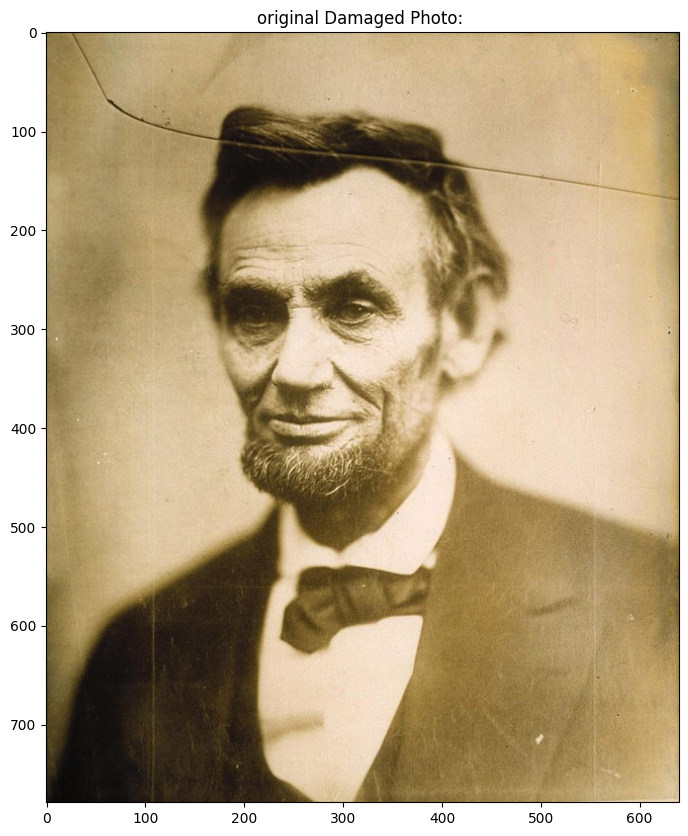

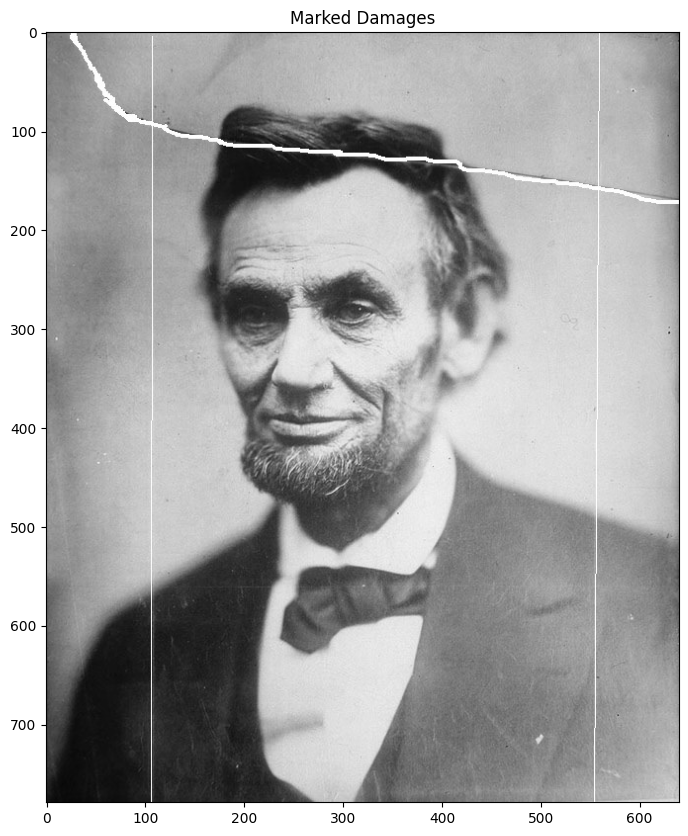

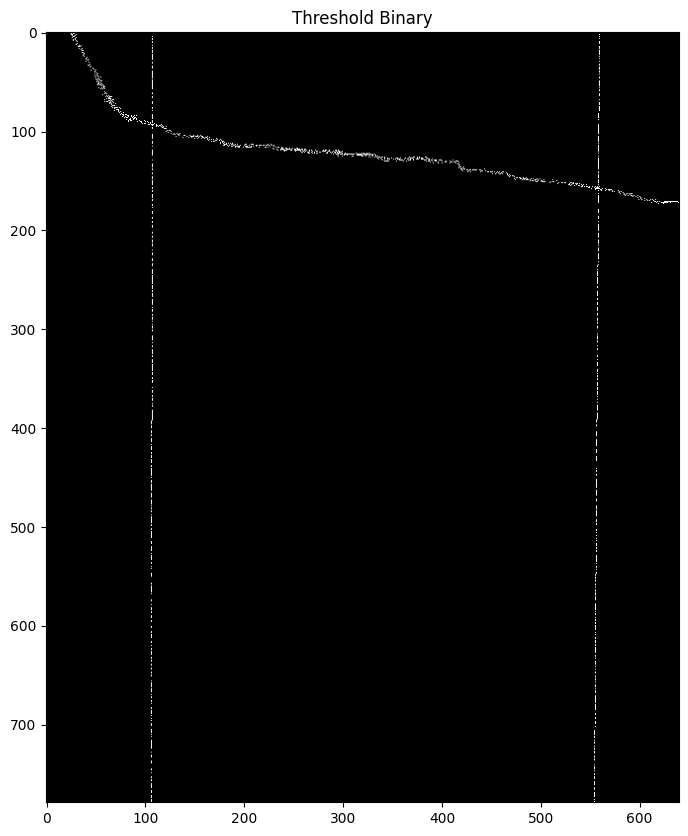

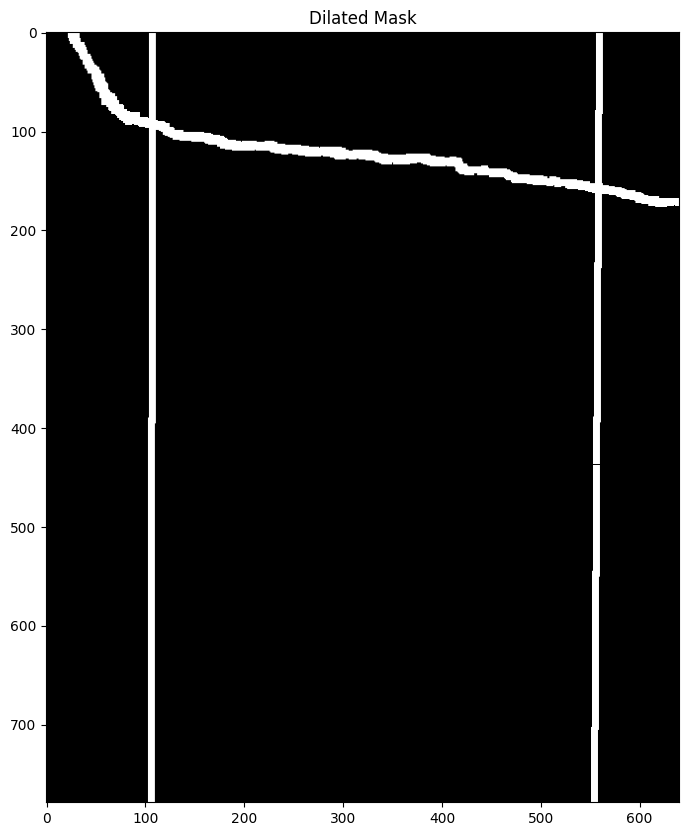

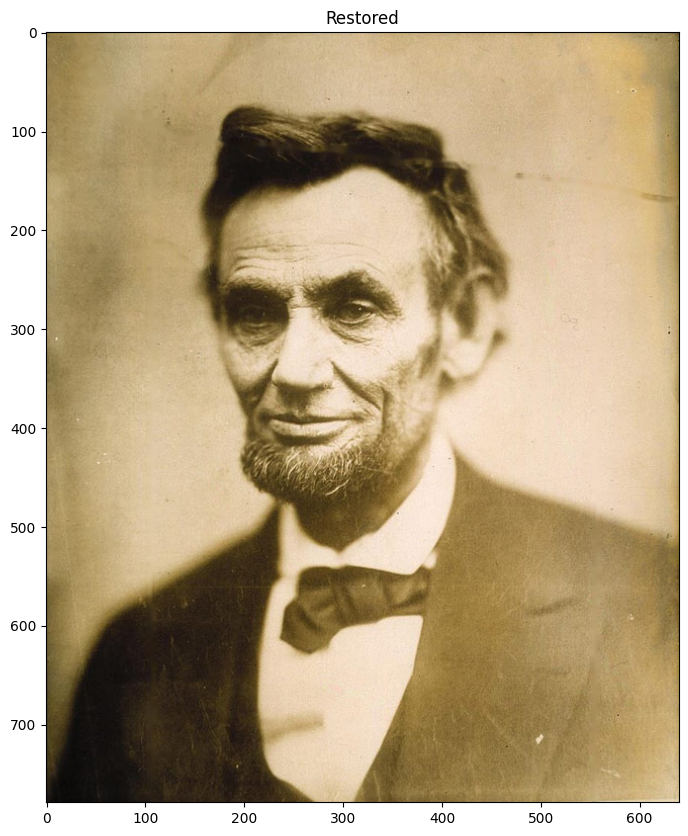

In [ ]:
#load the damaged photo
image = cv2.imread('images/abraham.jpg')
imshow('original Damaged Photo: ', image)

marked_damages = cv2.imread('images/mask.jpg', 0)
imshow('Marked Damages', marked_damages)

ret,thresh1 = cv2.threshold(marked_damages, 254, 255, cv2.THRESH_BINARY)
imshow('Threshold Binary', thresh1)

kernel = np.ones((7,7), np.uint8)
mask = cv2.dilate(thresh1, kernel, iterations = 1)
imshow('Dilated Mask', mask)
cv2.imwrite("images/abraham_mask.png", mask)

restored = cv2.inpaint(image, mask, 3, cv2.INPAINT_TELEA)
imshow('Restored', restored)